# Import packages 

In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
#train dataset
data = pd.read_csv('Train.csv') 

#test dataset
data_test = pd.read_csv('Test.csv')

In [3]:
#first 5 columns of train dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#statistical details related to train data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# visualization of data

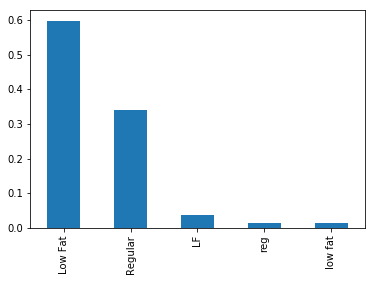

In [5]:
data['Item_Fat_Content'].value_counts(normalize = True).plot.bar()

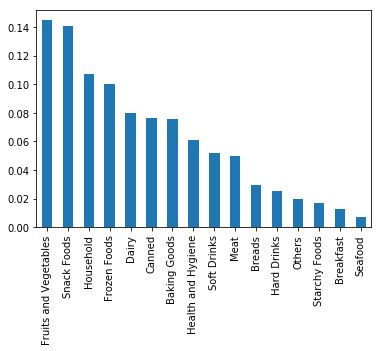

In [6]:
data['Item_Type'].value_counts(normalize = True).plot.bar()

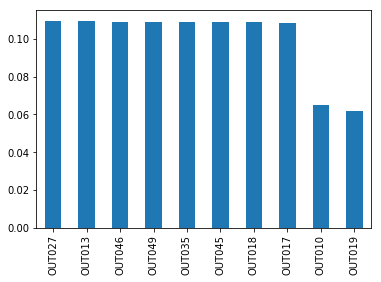

In [7]:
data['Outlet_Identifier'].value_counts(normalize = True).plot.bar()

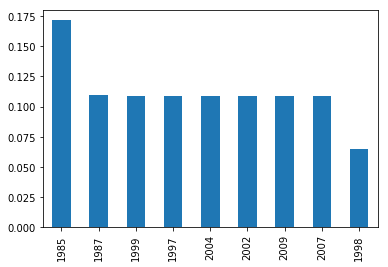

In [8]:
data['Outlet_Establishment_Year'].value_counts(normalize = True).plot.bar()

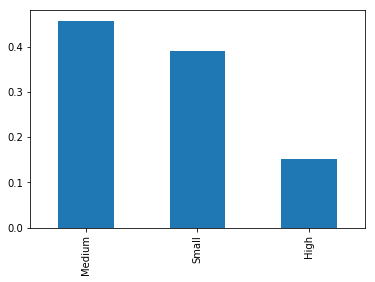

In [9]:
data['Outlet_Size'].value_counts(normalize = True).plot.bar()

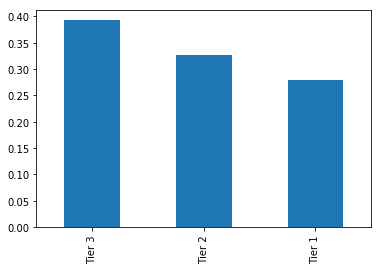

In [10]:
data['Outlet_Location_Type'].value_counts(normalize = True).plot.bar()

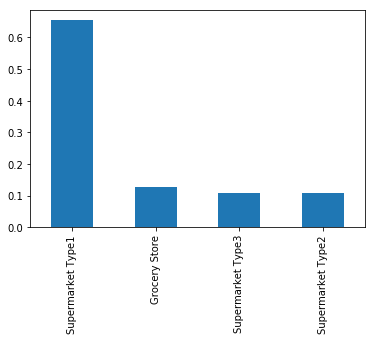

In [11]:
data['Outlet_Type'].value_counts(normalize = True).plot.bar()

In [12]:
my_tab = pd.crosstab(index = data['Item_Type'],columns = 'count')

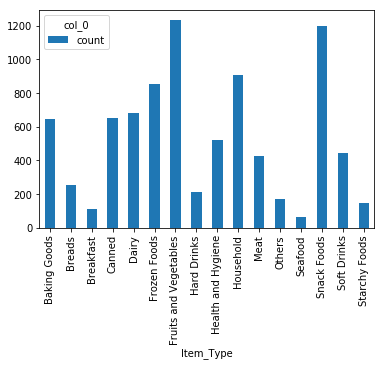

In [13]:
my_tab.plot.bar(stacked = True)

In [14]:
snack = data[data['Item_Type'] == 'Snack Foods']

In [15]:
data ['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
snack['Item_Outlet_Sales'].sum()

2732786.0870000003

In [17]:
fruits = data[data['Item_Type'] == 'Fruits and Vegetables']

In [18]:
fruits_sales = fruits['Item_Outlet_Sales'].sum()

In [19]:
snack = data[data['Item_Type'] == 'Snack Foods']

In [20]:
snack_sales = snack['Item_Outlet_Sales'].sum()

In [21]:
snack_sales

2732786.0870000003

In [22]:
Household = data[data['Item_Type'] == 'Household']

In [23]:
Household_sales = Household['Item_Outlet_Sales'].sum()

In [ ]:
Frozen =  data[data['Item_Type'] == 'Frozen Foods']

In [ ]:
Frozen_sales = Frozen['Item_Outlet_Sales'].sum()

In [ ]:
Dairy =  data[data['Item_Type'] == 'Dairy']
Dairy_sales = Frozen['Item_Outlet_Sales'].sum()

In [ ]:
Canned =  data[data['Item_Type'] == 'Canned']
Canned_sales = Frozen['Item_Outlet_Sales'].sum()


In [ ]:
Baking =  data[data['Item_Type'] == 'Baking Goods']
Baking_sales = Baking['Item_Outlet_Sales'].sum()

In [ ]:
Health =  data[data['Item_Type'] == 'Health and Hygiene']
Health_sales = Health['Item_Outlet_Sales'].sum()

In [ ]:
Soft_Drinks =  data[data['Item_Type'] == 'Soft Drinks']
Soft_Drinks_sales = Health['Item_Outlet_Sales'].sum()


In [ ]:
data_f = [{'fruits_sales':fruits_sales,
           'snack_sales':snack_sales,
          'Household_sales':Household_sales,
          'Frozen_sales':Frozen_sales,
          'Dairy_sales':Dairy_sales,
          'Canned_sales':Canned_sales,
          'Baking_sales':Baking_sales,
          'Health_sales':Health_sales,
          'Soft_Drinks_sales':Soft_Drinks_sales}]

In [ ]:
f = pd.DataFrame(data_f)


In [ ]:
f

,Baking_sales,Canned_sales,Dairy_sales,Frozen_sales,Health_sales,Household_sales,Soft_Drinks_sales,fruits_sales,snack_sales
0,1.265525e+06,1.825735e+06,1.825735e+06,1.825735e+06,1.045200e+06,2.055494e+06,1.045200e+06,2.820060e+06,2732786.087


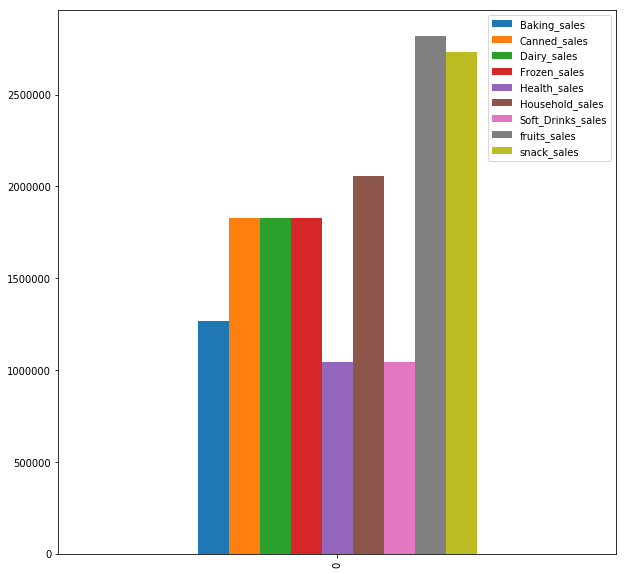

In [ ]:
f.plot.bar(figsize=(10,10))

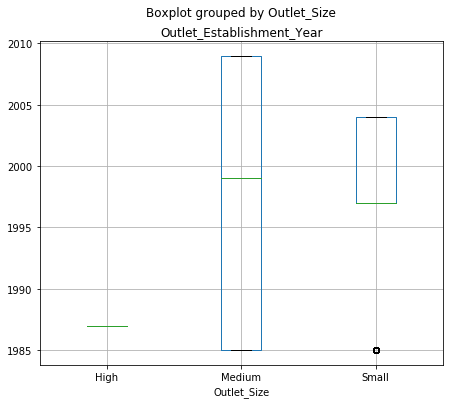

In [ ]:
data.boxplot(column = 'Outlet_Establishment_Year',by = 'Outlet_Size',figsize = (7,6))

In [ ]:
sns.pairplot(data)

/home/vivek/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vivek/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [ ]:
sns.distplot(data['Item_Outlet_Sales'])

In [ ]:
data['Item_Fat_Content'].value_counts()

In [ ]:
#replacing Lf with 0
data['Item_Fat_Content'].replace({'LF':0},inplace = True) 

In [ ]:
#replacing Low Fat with 0
data['Item_Fat_Content'].replace({'Low Fat':0},inplace = True)

In [ ]:
#replacing low fat with 0
data['Item_Fat_Content'].replace({'low fat':0},inplace = True)

In [ ]:
#replacing Regular with 1
data['Item_Fat_Content'].replace({'Regular':1},inplace = True)

In [ ]:
#replacing reg with 1
data['Item_Fat_Content'].replace({'reg':1},inplace = True)

In [ ]:
#value counts of Item_Fat_Content
data['Item_Fat_Content'].value_counts()

In [ ]:
#replacing 1 with Regular
data['Item_Fat_Content'].replace({1:'Regular'},inplace = True)

In [ ]:
#replacing 0 with Low Fat
data['Item_Fat_Content'].replace({0:'Low Fat'},inplace = True)

In [ ]:
#crosstable of Item_Fat_Content and Item_Type
pd.crosstab(data['Item_Fat_Content'],data['Item_Type'])

In [ ]:
#crosstable of Item_Type and Outlet_Size
pd.crosstab(data['Item_Type'],data['Outlet_Size'])

In [ ]:
#crosstable of Outlet_Location_Type and Outlet_size
pd.crosstab(data['Outlet_Location_Type'],data['Outlet_Size'])

In [ ]:
#crosstable of Outlet_Type and Outlet_Size
pd.crosstab(data['Outlet_Type'],data['Outlet_Size'])

In [ ]:
#crosstable of Outlet_Location_Type and Outlet_Type
pd.crosstab(data['Outlet_Location_Type'],data['Outlet_Type'])

# Dealing with missing data

In [ ]:
#sum of null data
data.isnull().sum()

In [ ]:
#filling missing data with the median of the data
data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace = True)

In [ ]:
#filling missing data with the mode of the data
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace = True)

In [ ]:
#sum of null data
data.isnull().sum()

In [ ]:
#sum of null test data
data_test.isnull().sum()

In [ ]:
#filling the null data with the median of data
data_test['Item_Weight'].fillna(data_test['Item_Weight'].median(),inplace = True)

In [ ]:
#filling the null data with the mode of data
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0],inplace = True)

In [ ]:
data_test.isnull().sum()

In [ ]:
#replacing LF,Low Fat,low fat with 0 
data_test['Item_Fat_Content'].replace({'LF':0},inplace = True)
data_test['Item_Fat_Content'].replace({'Low Fat':0},inplace = True)
data_test['Item_Fat_Content'].replace({'low fat':0},inplace = True)

In [ ]:
#replacing Regular,reg with 1
data_test['Item_Fat_Content'].replace({'Regular':1},inplace = True)
data_test['Item_Fat_Content'].replace({'reg':1},inplace = True)

In [ ]:
#value counts of Item_Fat_Content 
data_test['Item_Fat_Content'].value_counts()

In [ ]:
#replacing 1 with Regular 
data_test['Item_Fat_Content'].replace({1:'Regular'},inplace = True)

In [ ]:
#repling 0 with Low Fat
data_test['Item_Fat_Content'].replace({0:'Low Fat'},inplace = True)

In [ ]:
data_test.info()

In [ ]:
data.info()

In [ ]:
data.corr()

In [ ]:
from sklearn.model_selection import train_test_split # For spliting the data before training
from sklearn.linear_model import LinearRegression # For using LogisticRegression algorithm
from sklearn.metrics import accuracy_score # For checking accuarcy of model
import numpy as np  # for matrix operation
from math import sqrt # for taking square root
from sklearn.metrics import mean_squared_error # for checking error of data

In [ ]:
#train data
train_data = data

#test data
test_data = data_test


In [ ]:
#creating dummies data

mylist = list(train_data.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(train_data[mylist], prefix= mylist)

train_data.drop(mylist, axis=1, inplace = True)

X = pd.concat([train_data,dummies], axis =1 )

In [ ]:
X = train_data.drop('Item_Outlet_Sales',1)

In [ ]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train_data.Item_Outlet_Sales, test_size =0.2)

In [ ]:
model = LinearRegression()


# training a linear regression model on train

model.fit(x_train,y_train)

# predicting on cv

pred_cv = model.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

In [ ]:
# evaluation using r-square

model.score(x_train,y_train)

In [ ]:
#for crossvalidation  
from sklearn.model_selection import cross_val_score, cross_val_predict

#for using metrics
from sklearn import metrics

In [ ]:
#crossvalidation
scores = cross_val_score(model, X, train_data.Item_Outlet_Sales, cv=9)
scores

In [ ]:
#importing pacakge for GradientBoosingRegressor
from sklearn.ensemble import GradientBoostingRegressor 

In [ ]:
#creating GraientBoostingRegressor and fitting data to model
mod = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1)
mod.fit(X, train_data.Item_Outlet_Sales)

In [ ]:
#score of model
mod.score(x_train,y_train)

In [ ]:
#crossvalidation
scores = cross_val_score(mod, X, train_data.Item_Outlet_Sales, cv=9)
scores

In [ ]:
#temporary storing Item_Identifier
t = test_data['Item_Identifier'] 

#temporary storing Outlet_Identifier
o = test_data['Outlet_Identifier']

In [ ]:
#creating dummies of test data
mylist = list(test_data.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(test_data[mylist], prefix= mylist)

test_data.drop(mylist, axis=1, inplace = True)

Y = pd.concat([test_data,dummies], axis =1 )

In [ ]:
submission_p = mod.predict(test_data) #predicting on test data

# creating submission csv

In [ ]:
#importing sample submission csv
submission=pd.read_csv("SampleSubmission.csv")

In [ ]:
#putting the predicted value in 
submission['Item_Outlet_Sales'] = submission_p

In [ ]:
#putting the Item_Identifier of test data
submission['Item_Identifier'] = t

In [ ]:
#putting the Outlet_Identifier of test data
submission['Outlet_Identifier'] =o

In [ ]:
#creating csv for Item_Identifier 
pd.DataFrame(submission, columns=['Item_Identifier']).to_csv('identifier.csv')

In [ ]:
#creating csv for Outlet_Identifier
pd.DataFrame(submission, columns=['Outlet_Identifier']).to_csv('Outlet_identifier.csv')

In [ ]:
#creating csv for Item_Oullet_Sales
pd.DataFrame(submission, columns=['Item_Outlet_Sales']).to_csv('Item_Outlet_Sales.csv')

In [ ]:
#import csv of identifier,outlet_identifier,Item_Outlet_sales
item = pd.read_csv('identifier.csv')
outlet = pd.read_csv('Outlet_identifier.csv')
sales = pd.read_csv('Item_Outlet_Sales.csv')

In [ ]:
#concat identifier,outlet_identifier and Item_Outlet_Sales
finaldf = pd.concat([item, outlet, sales], axis=1, join='inner').sort_index()

In [ ]:
#
finaldf.info()

In [ ]:
#drop unnamed:0
f = finaldf.drop('Unnamed: 0',axis = 1)

In [ ]:
#set index as Item_Identifer
f = f.set_index('Item_Identifier')

In [ ]:
#export csv
f.to_csv('final_f.csv')